<a href="https://colab.research.google.com/github/rodmsmendes/reinforcementlearning4fun/blob/master/Scaling_attributes_of_Linear_Regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scalling attributes with normalization and standartisation

In this notebook, we revisit the example of Linear Regression with One Variable, and we compare the results of applying normalization and standartisation to the attributes before training the linear regression models.

Github version:
https://github.com/rodmsmendes/reinforcementlearning4fun/blob/master/Linear_Regression_with_one_variable.ipynb

Kaggle kernel version:
https://www.kaggle.com/rodolfomendes/scalling-attributes-with-normalization-and-standar

# 0. Importing libraries

In this section, we just import the necessaries libraries used in the example.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Linear Regression with one variable

In this section, we reproduce the linear regression models trained in [link]. We start by loading the data, selecting the attributes and filling the missing values. Then, we save the selected attributes, with the missing values filled in a new data frame.





In [0]:
url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
df = pd.read_csv(url)

df_float = df.select_dtypes(include=['float64']).copy()
df_float['SalePrice'] = df['SalePrice'].copy()

df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

After selecting the attributes, we create 3 (three) linear regression models. One for each of the non-target attributes.

In [21]:
lotFrontage = df_float[['LotFrontage']]
masVnrAre = df_float[['MasVnrArea']]
garageYrBlt = df_float[['GarageYrBlt']]
salePrice = df_float['SalePrice']

lr1 = LinearRegression()
lr1.fit(lotFrontage, salePrice)

lr2 = LinearRegression()
lr2.fit(masVnrAre, salePrice)

lr3 = LinearRegression()
lr3.fit(garageYrBlt, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We define the *plot_data_and_model* function to plot in a single chart both the real data and the respective linear model. This function will be reused many times in this notebook.

In [0]:
def plot_data_and_model(pos, input_attr, output_attr, df, lr):
  ax = plt.subplot(pos[0], pos[1], pos[2])
  plt.ylabel(output_attr)
  plt.xlabel(input_attr)
  ax = plt.scatter(df[input_attr], df[output_attr])
  ax = plt.plot(df[input_attr], lr.predict(df[[input_attr]]), linewidth=5.0, color='orange')

Then we use the previous function to plot the charts of the selected attributes and the respective linear models.

<Figure size 432x288 with 0 Axes>

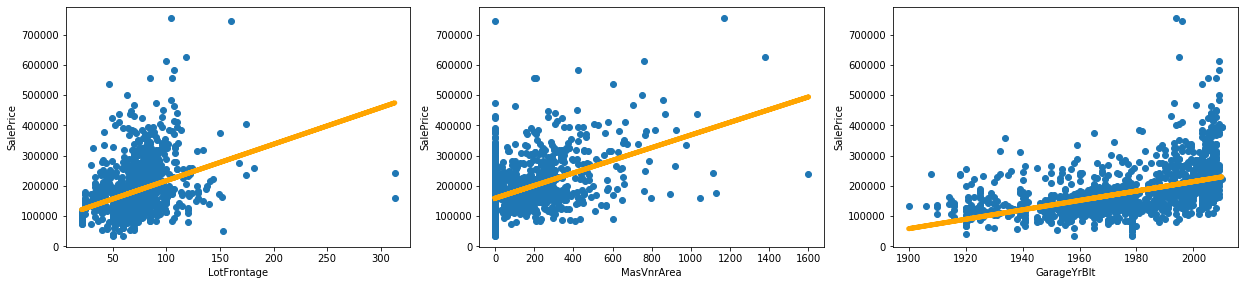

In [23]:
f = plt.figure()
f, ax = plt.subplots(1, 3, figsize=(21, 15))

plot_data_and_model((3, 3, 1), 'LotFrontage', 'SalePrice', df_float, lr1)
plot_data_and_model((3, 3, 2), 'MasVnrArea', 'SalePrice', df_float, lr2)
plot_data_and_model((3, 3, 3), 'GarageYrBlt', 'SalePrice', df_float, lr3)

# 2. Attributes in different scales

Observing the charts of the previous section, we noticed that the attributes have different intervals of values. This can make the data analysis harder. To overcome this problem, we can transform the attributes of a dataset to the same scale, making the comparison easier. Another advantage, is that some algorithms perform better with scaled features. In next sections, we are going to learn 2 (two) different methos of scaling attributes: normalization and standartisation. 

# 3. Scaling the attributes with normalization



In normalization, we scale an attribute so that all thew new values will be in the interval between 0 and 1. Considering the attribute $X$ is a column vector, we apply the formula:

$$ X^{norm} = \frac{X - X_{min}}{x_{max} - x_{min}}$$

where:


* $X^{norm}$: is the new scaled attribute
* $X_{min}$: is a column vector where all elements are equal to $x_{min}$
* $x_{min}$: is the minimum value of the $X$ attribute
* $x_{max}$: is the maximum value of the $X$ attribute

When normalizing an attribute, we subtract the minimum value from all values of the attribute and then divided them by the difference of the maximum and minimum value of the attribute. By applying this procedure, all elements of the new attribute will be in interval between 0 and 1. The mean value and standard deviation will be scaled as well, but the transforming will keep the data distribution.

The following section uses Pandas vectorized operations and the aggregate functions *min()* and *max()* to normalize the attribute *LotFrontage* and save the normalized attribute in new data frame.


In [0]:
df_norm = df_float.copy()
df_norm['LotFrontage'] = (df_float['LotFrontage'] - df_float['LotFrontage'].min()) / (df_float['LotFrontage'].max() - df_float['LotFrontage'].min())

With Pandas, we don't need to iterate over each attribute value. By using vectorized operations, we can perform operations directly using data columns.

After normalizing the *LotFrontage* attribute, we apply the normalization to other attributes as well:

In [0]:
df_norm['MasVnrArea'] = (df_float['MasVnrArea'] - df_float['MasVnrArea'].min()) / (df_float['MasVnrArea'].max() - df_float['MasVnrArea'].min())
df_norm['GarageYrBlt'] = (df_float['GarageYrBlt'] - df_float['GarageYrBlt'].min()) / (df_float['GarageYrBlt'].max() - df_float['GarageYrBlt'].min())
df_norm['SalePrice'] = (df_float['SalePrice'] - df_float['SalePrice'].min()) / (df_float['SalePrice'].max() - df_float['SalePrice'].min())

Then, we use the normalize attributes to create new Linear Regression models:

In [26]:
lotFrontage = df_norm[['LotFrontage']]
masVnrArea = df_norm[['MasVnrArea']]
garageYrBlt = df_norm[['GarageYrBlt']]
salePrice = df_norm['SalePrice']

lr_norm1 = LinearRegression()
lr_norm1.fit(lotFrontage, salePrice)

lr_norm2 = LinearRegression()
lr_norm2.fit(masVnrArea, salePrice)

lr_norm3 = LinearRegression()
lr_norm3.fit(garageYrBlt, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4. Scaling attributes with standartization

In standartisation, we scale the attributes so that all atributes have mean 0 (zero) and standard deviation 1 (one). To do this we apply the formula:

$$ X^{std} = \frac{X - \mu}{\sigma} $$

Where:
* $X^{std}$: is the new scaled attribute
* $X$: is a column vector representing our attribute
* $\mu$: is a column vector where all elements are the mean value of the attribute
* $\sigma$: is the standard deviation of the attribute


In our example, we create a separated *DataFrame* to hold the standardised attributes. Then we use vectorization and the aggregate functions *mean()* and *std()* to standardise the original attributes. 

In [0]:
df_std = df_float.copy()
df_std['LotFrontage'] = (df_float['LotFrontage'] - df_float['LotFrontage'].mean()) / df_float['LotFrontage'].std()

In [0]:
df_std['MasVnrArea'] = (df_float['MasVnrArea'] - df_float['MasVnrArea'].mean()) / df_float['MasVnrArea'].std()
df_std['GarageYrBlt'] = (df_float['GarageYrBlt'] - df_float['GarageYrBlt'].mean()) / df_float['GarageYrBlt'].std()
df_std['SalePrice'] = (df_float['SalePrice'] - df_float['SalePrice'].mean()) / df_float['SalePrice'].std()

After applying the standardisation, we use the new attributes to create new Linear Regression models and compare them with the previous ones.

In [29]:
lotFrontage = df_std[['LotFrontage']]
masVnrArea = df_std[['MasVnrArea']]
garageYrBlt = df_std[['GarageYrBlt']]
salePrice = df_std['SalePrice'] 
lr_std1 = LinearRegression()
lr_std1.fit(lotFrontage, salePrice)

lr_std2 = LinearRegression()
lr_std2.fit(masVnrArea, salePrice)

lr_std3 = LinearRegression()
lr_std3.fit(garageYrBlt, salePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5. Results

First, we join the dataframes in a single one, so we can use the function *describe()* and obtain a table with the summary statistics of the 3 (three) dataframes together. We use the sufix *_norm* to identify the normalized attributes and the sufix *_std* to identify the standardised attributes.

As expected, for the normalized attributes all values fall between 0 and 1. The mean and standard deviation are scaled as well.

For the standardised attributes, each one has their own minimum and maximum values. However, all mean values are set to 0 and all the standard deviation are 1. Because we centered our distribution at 0, now we have negative values for the scaled attributes.

In [30]:
df_all = df_float\
  .join(df_norm, rsuffix='_norm')\
  .join(df_std, rsuffix='_std')
df_all.describe().round(4) 

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_norm,MasVnrArea_norm,GarageYrBlt_norm,SalePrice_norm,LotFrontage_std,MasVnrArea_std,GarageYrBlt_std,SalePrice_std
count,1460.000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,70.050,103.6853,1978.5062,180921.1959,0.1680,0.0648,0.7137,0.2028,0.0000,0.0000,0.0000,0.0000
std,22.024,180.5691,23.9946,79442.5029,0.0754,0.1129,0.2181,0.1103,1.0000,1.0000,1.0000,1.0000
min,21.000,0.0000,1900.0000,34900.0000,0.0000,0.0000,0.0000,0.0000,-2.2271,-0.5742,-3.2718,-1.8381
25%,60.000,0.0000,1962.0000,129975.0000,0.1336,0.0000,0.5636,0.1320,-0.4563,-0.5742,-0.6879,-0.6413
50%,70.050,0.0000,1978.5062,163000.0000,0.1680,0.0000,0.7137,0.1779,0.0000,-0.5742,0.0000,-0.2256
75%,79.000,164.2500,2001.0000,214000.0000,0.1986,0.1027,0.9182,0.2487,0.4064,0.3354,0.9375,0.4164
max,313.000,1600.0000,2010.0000,755000.0000,1.0000,1.0000,1.0000,1.0000,11.0311,8.2867,1.3125,7.2263


In this cell, with build a dataframe using the parameters of the Linear Regression models we built. As consequence of the attribute scaling, the models parameters were scaled as well. All the models built with the standardised data has the intercept equals to 0 (zero).

In [31]:
data = {
    'Dataset': ['Original', 'Normalized', 'Standardized'],
    'Slope_1': [lr1.coef_[0], lr_norm1.coef_[0], lr_std1.coef_[0]],
    'Intercept_1': [lr1.intercept_, lr_norm1.intercept_, lr_std1.intercept_],
    'Slope_2': [lr2.coef_[0], lr_norm2.coef_[0], lr_std2.coef_[0]],
    'Intercept_2': [lr2.intercept_, lr_norm2.intercept_, lr_std2.intercept_],
    'Slope_3': [lr3.coef_[0], lr_norm3.coef_[0], lr_std3.coef_[0]],
    'Intercept_3': [lr3.intercept_, lr_norm3.intercept_, lr_std3.intercept_]
}

df_lr = pd.DataFrame(data, copy=True)
df_lr.round(3)

,Dataset,Slope_1,Intercept_1,Slope_2,Intercept_2,Slope_3,Intercept_3
0,Original,1208.016,96299.757,209.085,159242.125,1556.688,-2898995.104
1,Normalized,0.490,0.120,0.465,0.173,0.238,0.033
2,Standardized,0.335,-0.000,0.475,0.000,0.470,-0.000


Next, we plot the data and the models for each dataframe. The shape of the ploted data does not change between the different dataframes. That's because the Matplotlib library scales the intervals automatically to fit the figure. But we can notice that for each type of scaling, the respective chart has different axis intervals. For the original dataframe, the axis show the original intervals of values. For the normalized dataframe, all axis vary from 0 to 1. And for the standardised dataframe, the axis values are represented as multiples of the standard deviation. 

<Figure size 432x288 with 0 Axes>

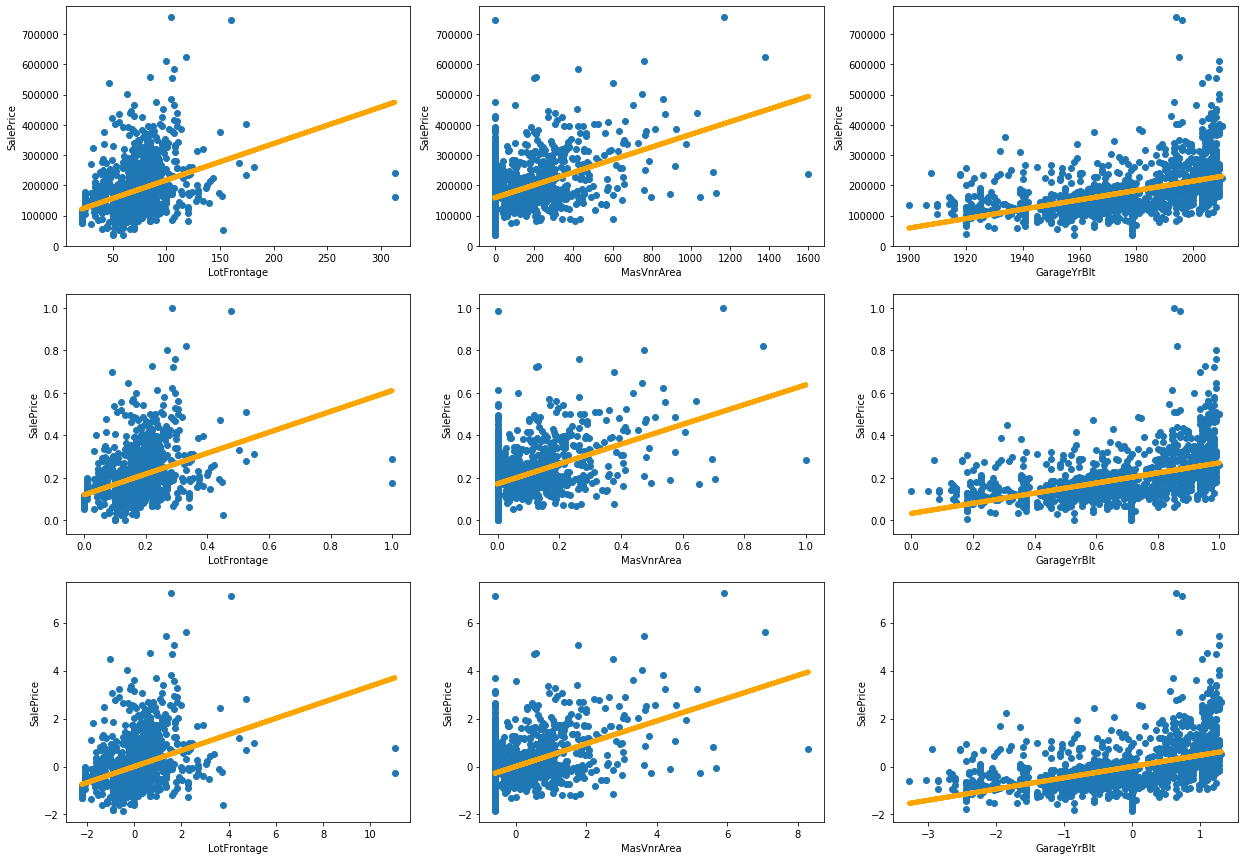

In [32]:
f = plt.figure()
f, ax = plt.subplots(3, 3, figsize=(21, 15))

plot_data_and_model((3, 3, 1), 'LotFrontage', 'SalePrice', df_float, lr1)
plot_data_and_model((3, 3, 2), 'MasVnrArea', 'SalePrice', df_float, lr2)
plot_data_and_model((3, 3, 3), 'GarageYrBlt', 'SalePrice', df_float, lr3)

plot_data_and_model((3, 3, 4), 'LotFrontage', 'SalePrice', df_norm, lr_norm1)
plot_data_and_model((3, 3, 5), 'MasVnrArea', 'SalePrice', df_norm, lr_norm2)
plot_data_and_model((3, 3, 6), 'GarageYrBlt', 'SalePrice', df_norm, lr_norm3)

plot_data_and_model((3, 3, 7), 'LotFrontage', 'SalePrice', df_std, lr_std1)
plot_data_and_model((3, 3, 8), 'MasVnrArea', 'SalePrice', df_std, lr_std2)
plot_data_and_model((3, 3, 9), 'GarageYrBlt', 'SalePrice', df_std, lr_std3)

ax = plt.show()

Finally, we compare the mean squared error of the model to check how scaling affects the performance of the models. We do this by calculating the mean squared errors of the models and saving them in a new dataframe. Them we plot a bar chart with the obtained scores of the models.

In [33]:
errors = {
    'LotFrontage': {
      'Original':mean_squared_error(df_float['SalePrice'], lr1.predict(df_float[['LotFrontage']])),
      'Normalized': mean_squared_error(df_norm['SalePrice'], lr_norm1.predict(df_norm[['LotFrontage']])),
      'Standardized': mean_squared_error(df_std['SalePrice'], lr_std1.predict(df_std[['LotFrontage']]))
    },
    'MasVnrArea': {
      'Original': mean_squared_error(df_float['SalePrice'], lr2.predict(df_float[['MasVnrArea']])),
      'Normalized': mean_squared_error(df_norm['SalePrice'], lr_norm2.predict(df_norm[['MasVnrArea']])),
      'Standardized': mean_squared_error(df_std['SalePrice'], lr_std2.predict(df_std[['MasVnrArea']]))
    },
    'GarageYrBlt': {
      'Original': mean_squared_error(df_float['SalePrice'], lr3.predict(df_float[['GarageYrBlt']])),
      'Normalized': mean_squared_error(df_norm['SalePrice'], lr_norm3.predict(df_norm[['GarageYrBlt']])),
      'Standardized': mean_squared_error(df_std['SalePrice'], lr_std3.predict(df_std[['GarageYrBlt']]))  
    } 
}

df_error = pd.DataFrame(errors)
df_error

,LotFrontage,MasVnrArea,GarageYrBlt
Original,5.599428e+09,4.882373e+09,4.912567e+09
Normalized,1.079837e-02,9.415543e-03,9.473770e-03
Standardized,8.872333e-01,7.736155e-01,7.783996e-01


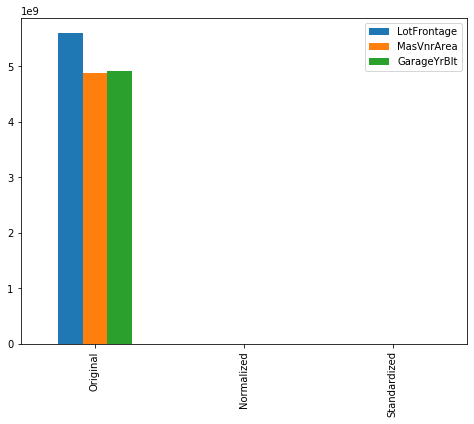

In [34]:
df_error.plot.bar(figsize=(8, 6))

The score of the models built from the scaled attributes are much lower than the original models. But this do not mean that the new models are better. We have to consider that the resulting errors are scaled as well. So, to compare the results better, we use the R² score, which is a relative score for regression models. With the R² score, better models score closer to 1.0.

In [35]:
errors = {
    'LotFrontage': {
      'Original':r2_score(df_float['SalePrice'], lr1.predict(df_float[['LotFrontage']])),
      'Normalized': r2_score(df_norm['SalePrice'], lr_norm1.predict(df_norm[['LotFrontage']])),
      'Standardized': r2_score(df_std['SalePrice'], lr_std1.predict(df_std[['LotFrontage']]))
    },
    'MasVnrArea': {
      'Original': r2_score(df_float['SalePrice'], lr2.predict(df_float[['MasVnrArea']])),
      'Normalized': r2_score(df_norm['SalePrice'], lr_norm2.predict(df_norm[['MasVnrArea']])),
      'Standardized': r2_score(df_std['SalePrice'], lr_std2.predict(df_std[['MasVnrArea']]))
    },
    'GarageYrBlt': {
      'Original': r2_score(df_float['SalePrice'], lr3.predict(df_float[['GarageYrBlt']])),
      'Normalized': r2_score(df_norm['SalePrice'], lr_norm3.predict(df_norm[['GarageYrBlt']])),
      'Standardized': r2_score(df_std['SalePrice'], lr_std3.predict(df_std[['GarageYrBlt']]))  
    } 
}

df_error = pd.DataFrame(errors)
df_error

,LotFrontage,MasVnrArea,GarageYrBlt
Original,0.112159,0.225854,0.221067
Normalized,0.112159,0.225854,0.221067
Standardized,0.112159,0.225854,0.221067


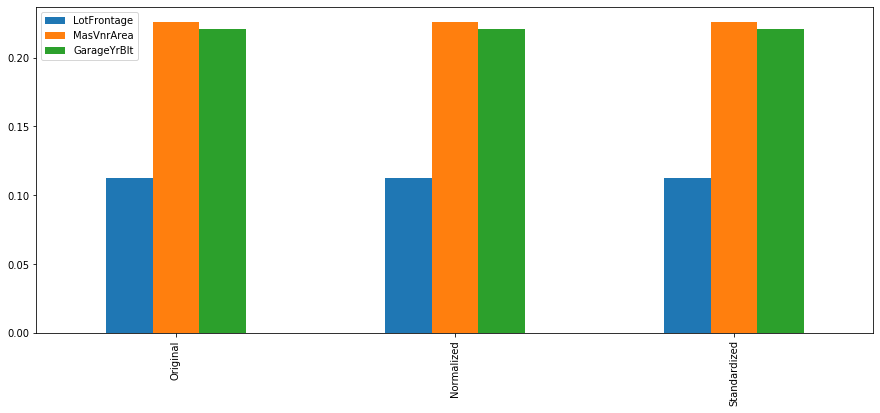

In [36]:
df_error.plot.bar(figsize=(15, 6))

When using R² score we observe that the scaled models have the same performance of the original models.

# 6. Conclusion

In this example, we applied the normalization and standartisation to scaled the attributes of our model and compared them with the original model. By observing the R² score we concluded that the scaling does not affect the final performance of Linear Regression models. However, by scaling the attributes it's easier to compare them during exploratory data analysis.